# Importing

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, jaccard_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing

Reading from txt file with `\t` separated

In [2]:
data = pd.read_csv("iyer.txt", sep="\t", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,-1,1.0,0.72,0.10,0.57,1.08,0.66,0.39,0.49,0.28,0.50,0.66,0.52
1,2,1,1.0,1.58,1.05,1.15,1.22,0.54,0.73,0.82,0.82,0.90,0.73,0.75
2,3,1,1.0,1.10,0.97,1.00,0.90,0.67,0.81,0.88,0.77,0.71,0.57,0.46
3,4,1,1.0,0.97,1.00,0.85,0.84,0.72,0.66,0.68,0.47,0.61,0.59,0.65
4,5,1,1.0,1.21,1.29,1.08,0.89,0.88,0.66,0.85,0.67,0.58,0.82,0.60


separating features `X` and label `y_true`

In [4]:
X = data.iloc[:, 2:].values
y_true = data.iloc[:, 1].values

In [5]:
X.shape

(517, 12)

In [6]:
y_true.shape

(517,)

In [7]:
set(y_true)

{-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

scaling the features using `standard scaler`

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performance Evaluation

1.   Rand score
2.   Jaccard score



In [9]:
def evaluate_clustering(y_true, y_pred):
    rand_index = adjusted_rand_score(y_true, y_pred)
    jaccard_coefficient = jaccard_score(y_true, y_pred, average='weighted')
    return rand_index, jaccard_coefficient

# Visualization

visualization with pca

In [10]:
def visualize_pca(X, y_pred, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [11]:
def visualize_tsne(X, y_pred, title):
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Determine number of clusters

1. Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

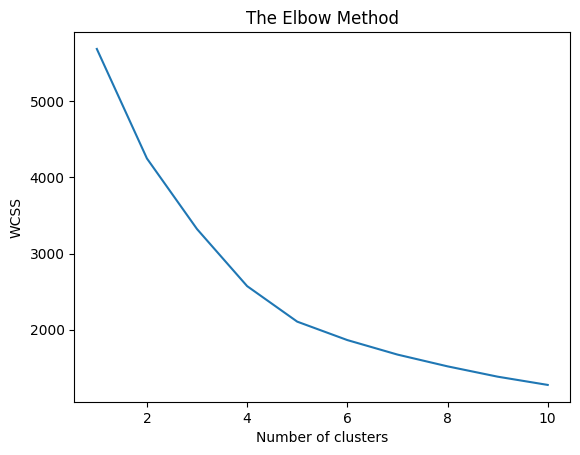

In [12]:
wcss = []
for i in range(1, len(np.unique(y_true))):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, len(np.unique(y_true))), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
no_of_clusters_kmeans = 5 # since the slope is getting smooth after 5

2. Dendrogram

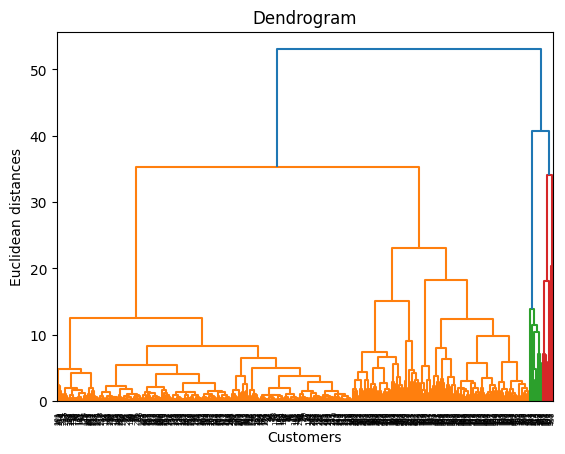

In [14]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
no_of_clusters_agg = 3 # since the gap from dist is more and has 3

3. Bayesian Information Criterion

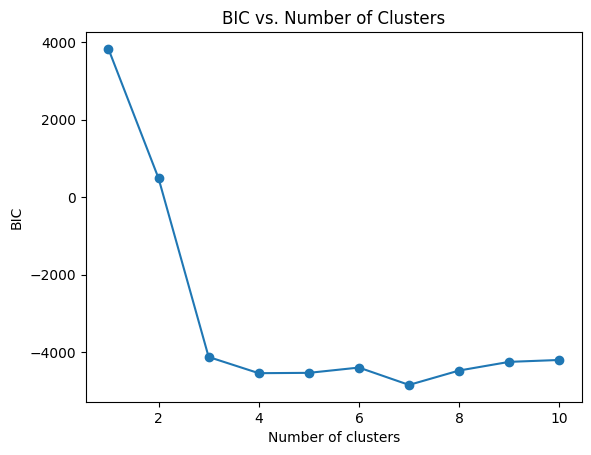

In [16]:
n_clusters_range = range(1, len(np.unique(y_true)))
bic_values = []
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_scaled)
    bic_values.append(gmm.bic(X_scaled))
plt.plot(n_clusters_range, bic_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.title('BIC vs. Number of Clusters')
plt.show()

In [17]:
no_of_clusters_gmm = 2 # since the slope decreases slowly from 2

# Clustering Algorithms

1. KMeans

In [18]:
kmeans = KMeans(n_clusters=no_of_clusters_kmeans, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
rand_index_kmeans, jaccard_kmeans = evaluate_clustering(y_true, y_kmeans)
print("K-means rand_index", rand_index_kmeans)
print("K-means jaccard_score", jaccard_kmeans)

K-means rand_index 0.2161572445500522
K-means jaccard_score 0.05479422030564216


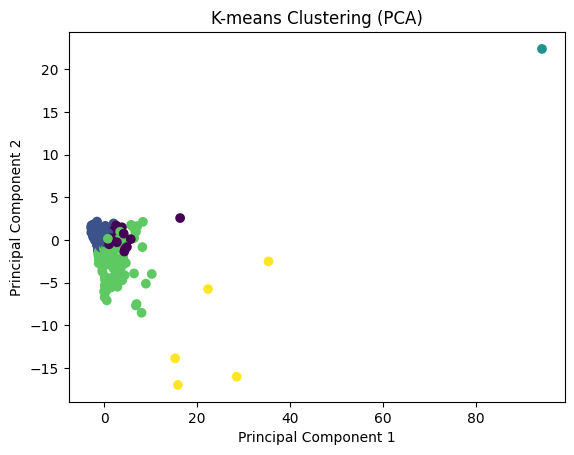

In [20]:
visualize_pca(X, y_kmeans, 'K-means Clustering (PCA)')

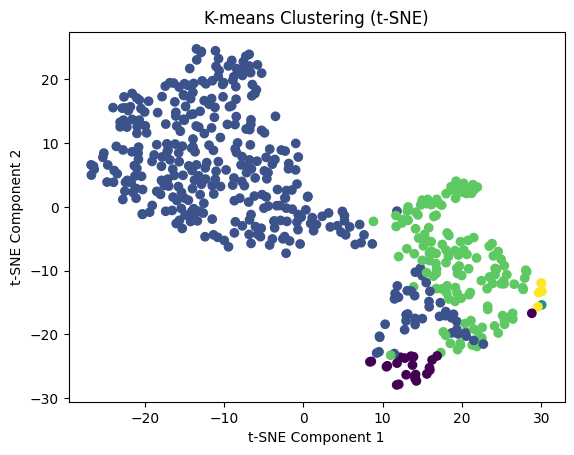

In [21]:
visualize_tsne(X, y_kmeans, 'K-means Clustering (t-SNE)')

2. Hierarchical Agglomerative clustering with `euclidean` and `manhattan`

In [22]:
agg_euclidean = AgglomerativeClustering(n_clusters=no_of_clusters_agg, affinity = 'euclidean', linkage = 'ward')
y_agg_euclidean = agg_euclidean.fit_predict(X_scaled)

agg_clustering_manhattan = AgglomerativeClustering(n_clusters=no_of_clusters_agg, linkage='complete', affinity='manhattan')
y_agg_manhattan = agg_clustering_manhattan.fit_predict(X_scaled)

rand_index_agg_euclidean, jaccard_agg_euclidean = evaluate_clustering(y_true, y_agg_euclidean)
rand_index_agg_manhattan, jaccard_agg_manhattan = evaluate_clustering(y_true, y_agg_manhattan)
print("Hierarchical Agglomerative euclidean rand_index", rand_index_agg_euclidean)
print("Hierarchical Agglomerative euclidean jaccard_score", jaccard_agg_euclidean)
print("Hierarchical Agglomerative manhattan rand_index", rand_index_agg_manhattan)
print("Hierarchical Agglomerative manhattan jaccard_score", jaccard_agg_manhattan)

Hierarchical Agglomerative euclidean rand_index 0.02186318579608843
Hierarchical Agglomerative euclidean jaccard_score 0.0
Hierarchical Agglomerative manhattan rand_index 0.0033308901269597986
Hierarchical Agglomerative manhattan jaccard_score 0.07958377967121773


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


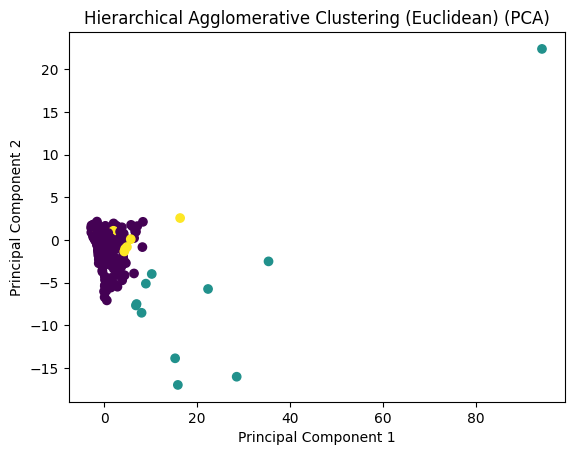

In [23]:
visualize_pca(X, y_agg_euclidean, 'Hierarchical Agglomerative Clustering (Euclidean) (PCA)')

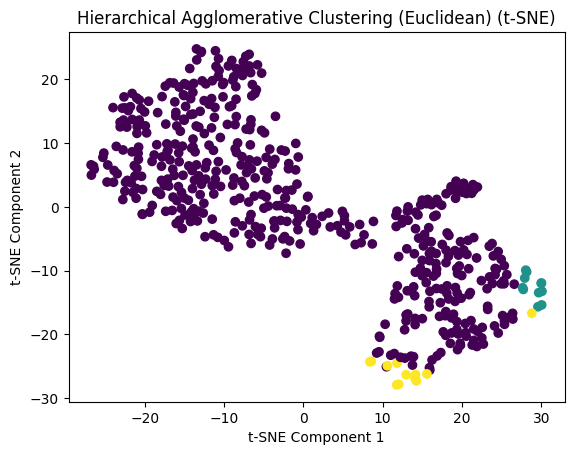

In [24]:
visualize_tsne(X, y_agg_euclidean, 'Hierarchical Agglomerative Clustering (Euclidean) (t-SNE)')

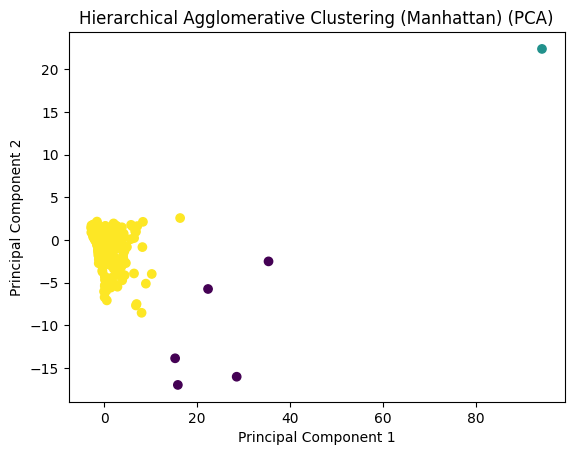

In [25]:
visualize_pca(X, y_agg_manhattan, 'Hierarchical Agglomerative Clustering (Manhattan) (PCA)')

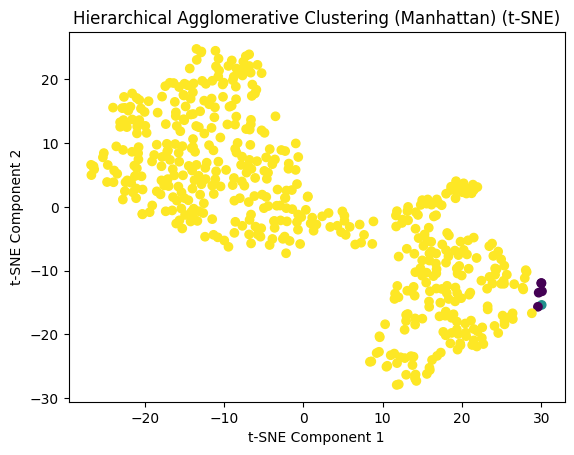

In [26]:
visualize_tsne(X, y_agg_manhattan, 'Hierarchical Agglomerative Clustering (Manhattan) (t-SNE)')

3. Gaussian Mixture

In [27]:
gmm = GaussianMixture(n_components=no_of_clusters_gmm, random_state=42)
y_gmm = gmm.fit_predict(X_scaled)

In [28]:
rand_index_gmm, jaccard_gmm = evaluate_clustering(y_true, y_gmm)
print("Gaussian Mixture rand_index", rand_index_gmm)
print("Gaussian Mixture jaccard_score", jaccard_gmm)

Gaussian Mixture rand_index 0.003316927094728602
Gaussian Mixture jaccard_score 0.0


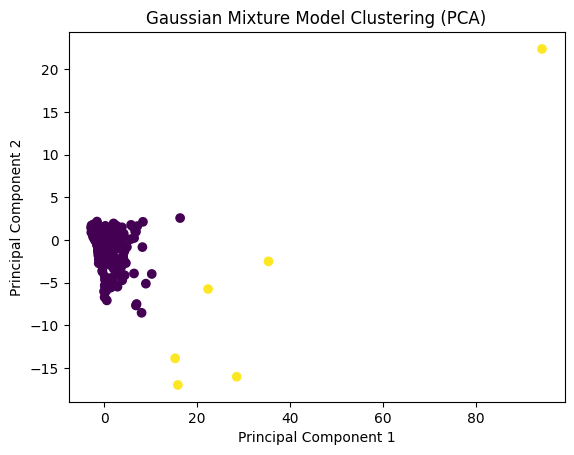

In [29]:
visualize_pca(X, y_gmm, 'Gaussian Mixture Model Clustering (PCA)')

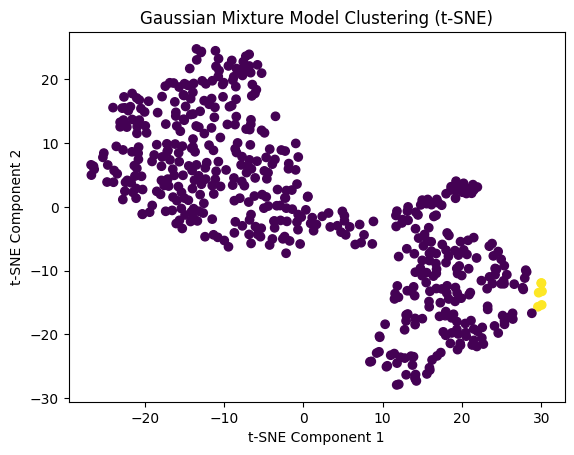

In [30]:
visualize_tsne(X, y_gmm, 'Gaussian Mixture Model Clustering (t-SNE)')